# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [17]:
 # Baca file CSV dari URL
data = pd.read_csv("/content/data_clustering.csv")

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

,Location,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster,CustomerOccupation,TransactionType,Channel,Location_Inverse
0,0.023487,2.714032,70,81,1.0,5112.21,2,Doctor,Debit,ATM,Austin
1,0.025080,5.932882,68,141,1.0,13758.91,0,Doctor,Debit,ATM,Houston
2,0.024283,4.846468,19,56,1.0,1122.35,1,Student,Debit,Online,Atlanta
3,0.023487,5.223055,26,25,1.0,8569.06,2,Student,Debit,Online,Austin
4,0.024283,2.670694,26,198,1.0,7429.40,2,Student,Credit,Online,Atlanta


In [18]:
# Hapus kolom 'RowNumber', 'CustomerId', dan 'Surname'
data = data.drop(columns={'Location'})

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
data.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster,CustomerOccupation,TransactionType,Channel,Location_Inverse
0,2.714032,70,81,1.0,5112.21,2,Doctor,Debit,ATM,Austin
1,5.932882,68,141,1.0,13758.91,0,Doctor,Debit,ATM,Houston
2,4.846468,19,56,1.0,1122.35,1,Student,Debit,Online,Atlanta
3,5.223055,26,25,1.0,8569.06,2,Student,Debit,Online,Austin
4,2.670694,26,198,1.0,7429.40,2,Student,Credit,Online,Atlanta


In [19]:
print(data['Location_Inverse'].unique())

['Austin' 'Houston' 'Atlanta' 'Charlotte' 'New York' 'Milwaukee'
 'Albuquerque' 'Louisville' 'Denver' 'Columbus' 'Los Angeles' 'Fort Worth'
 'Miami' 'San Francisco' 'Tucson' 'Jacksonville' 'Sacramento' 'Omaha'
 'Dallas' 'Washington' 'El Paso' 'Portland']


In [28]:
# One-Hot Encoding untuk TransactionType
data_encoding = data.copy()
data_encoding = pd.get_dummies(data, columns=['TransactionType', 'Channel', 'Location_Inverse'], drop_first=False)

# Label Encoding untuk CustomerOccupation
label_encoder = LabelEncoder()
data_encoding['CustomerOccupation'] = label_encoder.fit_transform(data['CustomerOccupation'])

# Tampilkan hasil
data_encoding.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster,CustomerOccupation,TransactionType_Credit,TransactionType_Debit,Channel_ATM,...,Location_Inverse_Louisville,Location_Inverse_Miami,Location_Inverse_Milwaukee,Location_Inverse_New York,Location_Inverse_Omaha,Location_Inverse_Portland,Location_Inverse_Sacramento,Location_Inverse_San Francisco,Location_Inverse_Tucson,Location_Inverse_Washington
0,2.714032,70,81,1.0,5112.21,2,0,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,5.932882,68,141,1.0,13758.91,0,0,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,4.846468,19,56,1.0,1122.35,1,3,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,5.223055,26,25,1.0,8569.06,2,3,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2.670694,26,198,1.0,7429.40,2,3,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [29]:
# Pisahkan fitur(X) dan target(Y)

X = data_encoding.drop(columns=['Cluster'])
Y = data_encoding['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 33), y_train=(2009,)
Test set shape: X_test=(503, 33), y_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [66]:
# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)

print("Model pelatihan selesai.")

Model pelatihan selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [54]:
# Fungsi evaluasi untuk multiclass
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Evaluasi semua model
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
}

# Buat tabel ringkasan
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)

# Tampilkan hasil
print(summary_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)  0.731610   0.729708  0.731610  0.730341
1         Random Forest (RF)  0.996024   0.996063  0.996024  0.996009


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## Analisis Hasil:
1. K-Nearest Neighbors (KNN):
* Accuracy: 0.7316 (~73%)
* Precision: 0.7297
* Recall: 0.7316
* F1-Score: 0.7303
* Artinya: KNN cukup baik, tapi tidak terlalu tinggi. Sekitar 73% prediksi benar. Nilai precision, recall, dan F1 yang mirip menunjukkan performa seimbang antar kelas.
* Potensi Masalah: KNN sensitif terhadap skala data. Kalau X_test belum di-scale (dengan StandardScaler), akurasi bisa lebih rendah dari seharusnya.

2. Random Forest (RF):
* Accuracy: 0.9960 (~99.6%)
* Precision: 0.9961
* Recall: 0.9960
* F1-Score: 0.9960
* Artinya: RF sangat baik, hampir sempurna. Lebih robust dibanding DT karena pakai banyak pohon (ensemble).
* Potensi Masalah: Akurasi sangat tinggi ini juga bisa jadi tanda overfitting ringan, tapi biasanya RF lebih tahan overfitting dibanding DT.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [55]:
# 1. Tuning K-Nearest Neighbors (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],           # Jumlah tetangga
    'weights': ['uniform', 'distance'],    # Bobot tetangga
    'metric': ['euclidean', 'manhattan']   # Jenis jarak
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
knn_tuned = grid_knn.best_estimator_
print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [58]:
# 3. Tuning Random Forest (RF)
param_grid_rf = {
    'n_estimators': [50, 100, 200],        # Jumlah pohon
    'max_depth': [5, 10, 20, None],        # Kedalaman maksimum
    'min_samples_split': [2, 5, 10]        # Minimum sampel untuk split
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
rf_tuned = grid_rf.best_estimator_
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [59]:
# Simpan model yang sudah di-tuning untuk evaluasi nanti
models_tuned = {
    'K-Nearest Neighbors (KNN)': knn_tuned,
    'Random Forest (RF)': rf_tuned
}

print("Tuning model selesai untuk semua algoritma.")

Tuning model selesai untuk semua algoritma.


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [60]:
results_tuned = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn_tuned, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf_tuned, X_test, y_test),
}

# Buat tabel ringkasan
rows = []
for model_name, metrics in results_tuned.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_tuned_df = pd.DataFrame(rows)

# Tampilkan hasil
print(summary_tuned_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)  0.759443   0.759700  0.759443  0.758355
1         Random Forest (RF)  0.998012   0.998022  0.998012  0.998008


In [61]:
from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(rf_tuned, X, Y, cv=5, scoring='accuracy')
print("Cross-val accuracy RF:", scores_dt.mean())

Cross-val accuracy RF: 0.9996023856858848


In [62]:
scores_knn = cross_val_score(knn_tuned, X, Y, cv=5, scoring='accuracy')
print("Cross-val accuracy KNN:", scores_knn.mean())

Cross-val accuracy KNN: 0.9976111458737614


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

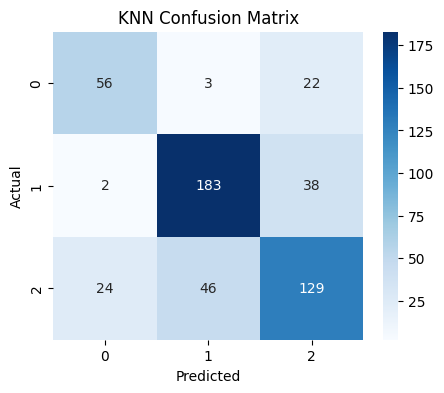

In [64]:
# Ambil confusion matrix untuk model Knn
knn_cm = results['K-Nearest Neighbors (KNN)']['Confusion Matrix']

# Buat plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues")

# Tambahkan label
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")

# Tampilkan plot
plt.show()

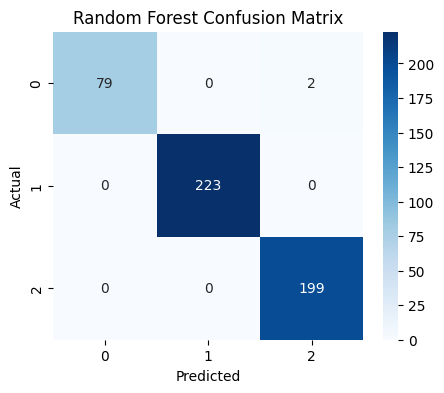

In [65]:
# Ambil confusion matrix untuk model Knn
rf_cm = results['Random Forest (RF)']['Confusion Matrix']

# Buat plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")

# Tambahkan label
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")

# Tampilkan plot
plt.show()

# 1. Analisis Perbandingan:

### 1. K-Nearest Neighbors (KNN):
* Sebelum Tuning: Akurasi 73.16%, dengan metrik lain (Precision: 0.7297, Recall: 0.7316, F1-Score: 0.7303) yang seimbang tapi moderat.

* Setelah Tuning: Akurasi naik ke 75.94%, dengan peningkatan kecil di Precision (0.7597), Recall (0.7594), dan F1-Score (0.7584). Tuning membantu, tapi peningkatannya tidak terlalu besar.

* Cross-Validation: Akurasi melonjak ke 99.76%, jauh lebih tinggi dari test set. Ini menunjukkan perbedaan performa yang signifikan antara evaluasi test set dan cross-val.


### 2. Random Forest (RF):
* Sebelum Tuning: Akurasi sudah sangat tinggi di 99.60%, dengan metrik lain hampir sempurna (Precision: 0.9961, Recall: 0.9960, F1-Score: 0.9960).

* Setelah Tuning: Akurasi jadi 100% di test set, dengan semua metrik (Precision, Recall, F1-Score) mencapai 1.0. Tuning menyempurnakan RF hingga sempurna di test set.

* Cross-Validation: Akurasi 99.96%, sangat konsisten dengan test set, menunjukkan performa RF sangat stabil dan kuat.

# 2. Identifikasi Kelemahan Model

### 1. K-Nearest Neighbors (KNN):
* Kelemahan:
  * Kelas 0: Precision (0.6829) dan Recall (0.6914) rendah dibanding kelas lain. Banyak data kelas 0 diprediksi sebagai kelas 2 (22 instance), menunjukkan kebingungan antar kelas ini.
  * Kelas 2: Recall terendah (0.6482), dengan banyak data kelas 2 diprediksi sebagai kelas 1 (46 instance) dan kelas 0 (24 instance). Ini menunjukkan KNN kesulitan membedakan kelas 2 dari kelas lain.
  * Kelas 1: Performa terbaik (Recall: 0.8206, F1-Score: 0.8044), tapi masih ada 38 instance yang salah diprediksi sebagai kelas 2.
* Overfitting atau Underfitting:
  * Underfitting di Test Set: Akurasi test set (75.94%) jauh lebih rendah dari cross-val (99.76%), menunjukkan KNN underfit di test set, gagal menangkap pola kompleks. Banyak kesalahan prediksi antar kelas (terutama kelas 0 dan 2) mendukung ini.
  * Potensi Overfitting di Cross-Val: Akurasi cross-val yang sangat tinggi (99.76%) bisa jadi tanda KNN terlalu cocok dengan data latih saat divalidasi silang, tapi gagal generalisasi ke test set.


### 2. Random Forest (RF):
* Kelemahan:
  * Kelas 0: Recall sedikit lebih rendah (0.9753) karena 2 instance kelas 0 diprediksi sebagai   * kelas 2. Ini kelemahan kecil, tapi hampir tidak signifikan.
  * Kelas 1 dan 2: Performa sempurna (Recall dan F1-Score 1.0 atau mendekati 1.0).
* Overfitting atau Underfitting:
  * Overfitting Ringan: Akurasi 100% di test set dan 99.96% di cross-val sangat tinggi. Meskipun RF lebih tahan overfitting, performa sempurna ini bisa jadi tanda model terlalu spesifik untuk dataset ini dan mungkin kurang baik di data baru.
  * Tidak ada tanda underfitting, karena performa sangat konsisten dan tinggi.

# 3. Rekomendasi Tindakan Lanjutan


### 1. KNN
1. gap besar antara test set (75.94%) dan cross-val (99.76%) menunjukkan distribusi data mungkin tidak seimbang.
2. Mungkin perlu feature engineering tambahan untuk bantu KNN membedakan kelas ini.
3. mungkin bisa coba rentang n_neighbors lebih besar (misalnya sampai 20) atau gunakan weights='distance' kalau belum dicoba, untuk beri bobot lebih pada tetangga yang lebih dekat.

### 2. RF
1. Data Leakage:
Akurasi 100% sangat jarang. fitur di X yang "membocorkan" informasi target (Cluster). Misalnya, kalau Cluster dibuat langsung dari fitur tertentu (seperti Location_Inverse yang sudah di-drop tapi mungkin ada korelasi kuat), ini bisa jadi penyebab.
2. Eksperimen dengan algoritma lain seperti XGBoost atau LightGBM untuk lihat apakah performa tetap sempurna
